<a href="https://colab.research.google.com/github/RishavRajSharma/NNDL-Lab/blob/main/RGB_to_Grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


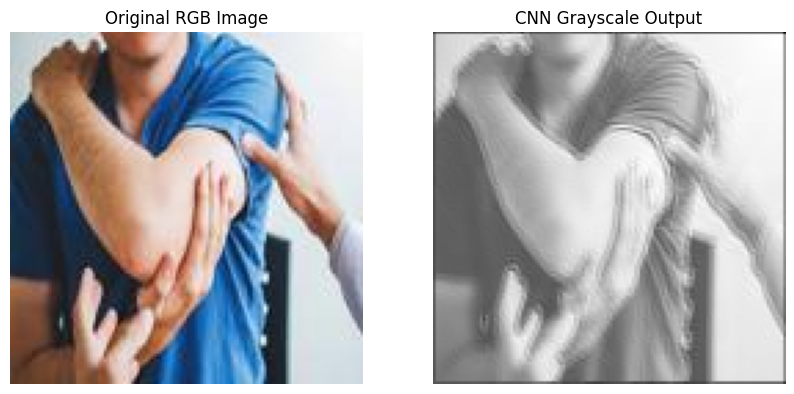

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

image_path = "/kaggle/input/body-parts-dataset/Body Parts Dataset/Elbow/Elbow_102.jpg"

img = cv2.imread(image_path)

if img is None:
    raise ValueError("Image not found. Check the image path.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img / 255.0

img = cv2.resize(img, (128, 128))

img_input = np.expand_dims(img, axis=0)

# CNN Model (RGB → Grayscale)

model = Sequential([
    Conv2D(
        filters=1,               # single channel output
        kernel_size=(3, 3),
        padding="same",
        input_shape=(128, 128, 3)
    )
])

gray_output = model.predict(img_input)

# Remove batch & channel dimension
gray_image = gray_output[0, :, :, 0]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original RGB Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("CNN Grayscale Output")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

plt.show()